In [11]:
#Imports

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [35]:
# print("COLORIZING B/W IMAGE INTO COLORED IMAGE...")
# Loading caffe colorization model

net = cv2.dnn.readNetFromCaffe('./colorization_deploy_v2.prototxt','./colorization_release_v2.caffemodel')
pts = np.load('./pts_in_hull.npy')


In [36]:
# Setting parameters
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2,313,1,1)

net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float32')]

In [47]:
# Loading image
# image = Image.open('/home/maaz/DSU/soc solution/colorizeImage/amna qadir/BW/Images/robin_williams.jpg')
image = cv2.imread('./robin_williams.jpg')

# np.float32(image)

#processing image 

scaled = np.float32(image)/255.0
lab = cv2.cvtColor(scaled,cv2.COLOR_BGR2LAB)


resized = cv2.resize(lab,(224,224))
L = cv2.split(resized)[0]
L -= 50


In [48]:

net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1,2,0))

ab = cv2.resize(ab, (image.shape[1],image.shape[0]))

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:,:,np.newaxis], ab), axis=2)


In [49]:
colorized = cv2.cvtColor(colorized,cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized,0,1)

colorized = (255 * colorized).astype("uint8")

In [56]:
cv2.imshow("Original",image)
cv2.imshow("Colorized",colorized)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


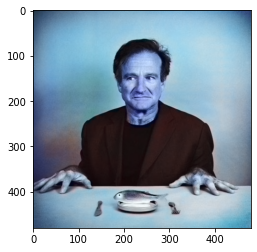

In [40]:
# img = mpimg.imread(colorized)
# imgplot = plt.imshow(img)
# plt.show()

plt.imshow(colorized)

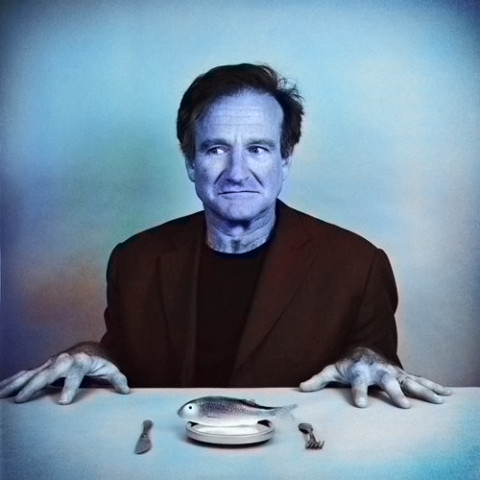

In [41]:
Image.fromarray(colorized)